In [84]:
import pandas as pd
import numpy as np

r_cols = ['user_id', 'movie_id','rating']
df1 = pd.read_csv('u.data',sep='\t', names=r_cols, usecols=range(3),encoding="ISO-8859-1")
type(df1)

pandas.core.frame.DataFrame

In [85]:
print(df1.shape)
df1.head(2)

(100003, 3)


,user_id,movie_id,rating
0,0,50,5
1,0,172,5


We have the film title name in onother dataframe, so we need to import it and after add it to the initial DF

In [86]:
m_cols = ['movie_id', 'title']
df2 = pd.read_csv('u.item', sep='|', names=m_cols, usecols=range(2), encoding="ISO-8859-1")
print(df2.shape)
df2.head(2)

(1682, 2)


,movie_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)


In [87]:
df_merge = pd.merge(df2,df1,on='movie_id')  #
print(df_merge.shape)
df_merge.head(2)

(100003, 4)


,movie_id,title,user_id,rating
0,1,Toy Story (1995),308,4
1,1,Toy Story (1995),287,5


In [88]:
#Let's calculate a DataFrame for statistic for each film
movie_info = df_merge.groupby('title').agg({'rating':[np.size,np.mean]})
movie_info.head(10)

rating          
                                              size      mean
title                                                       
'Til There Was You (1997)                        9  2.333333
1-900 (1994)                                     5  2.600000
101 Dalmatians (1996)                          109  2.908257
12 Angry Men (1957)                            125  4.344000
187 (1997)                                      41  3.024390
2 Days in the Valley (1996)                     93  3.225806
20,000 Leagues Under the Sea (1954)             72  3.500000
2001: A Space Odyssey (1968)                   259  3.969112
3 Ninjas: High Noon At Mega Mountain (1998)      5  1.000000
39 Steps, The (1935)                            59  4.050847

In [145]:
df = df_merge.pivot_table(index='user_id',columns='title',values='rating')
df.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
df2[df2['title'].str.contains('Star Trek')]

,movie_id,title
221,222,Star Trek: First Contact (1996)
226,227,Star Trek VI: The Undiscovered Country (1991)
227,228,Star Trek: The Wrath of Khan (1982)
228,229,Star Trek III: The Search for Spock (1984)
229,230,Star Trek IV: The Voyage Home (1986)
379,380,Star Trek: Generations (1994)
448,449,Star Trek: The Motion Picture (1979)
449,450,Star Trek V: The Final Frontier (1989)


In [91]:
#we have found a film to start with. It is better to start with some title where we already know correlations because 
#it will help us understand if we are choosing the right film or not
#So let's take Star Trek first contact and we'll check correlations of it with other films
#FOr the carrelation calculus, we can use a simple function built in in pandas

In [92]:
#Let's consider from our pivot just the column with the film of our interest:
X = df['Star Trek: First Contact (1996)']

In [93]:
corr = df.corrwith(X)

/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3175: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3109: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


In [94]:
corr.sort_values(ascending=False).head(10)

title
Alphaville (1965)                         1.0
City of Angels (1998)                     1.0
Killer (Bulletproof Heart) (1994)         1.0
Kim (1950)                                1.0
King of the Hill (1993)                   1.0
Ladybird Ladybird (1994)                  1.0
Last Time I Saw Paris, The (1954)         1.0
Maya Lin: A Strong Clear Vision (1994)    1.0
Best Men (1997)                           1.0
Jerky Boys, The (1994)                    1.0
dtype: float64

In [12]:
#As we can see, in this result it is really strange that there is no correlation with any other film of the Start
#Trek serie. This is probably because we are not filtering films with low number of ratings, In fact, the more ratings
#we have, the more will be the probability to find the correct similarity

In [13]:
#So let's try to filter the film with low number of ratings. To understand where to put the limit, we can plot
#a graph where we see the distribution of number of ratings

In [14]:
import seaborn as sns

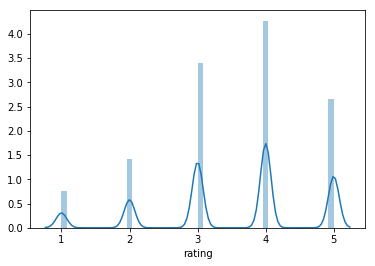

In [15]:
sns.distplot(df_merge['rating'])

In [37]:
df_dist_recensioni = df_merge.pivot_table(index='title',values='rating',aggfunc='count')

In [38]:
df_dist_recensioni.head(10)  #this DataFrame gives me the count of ratings for film in order to filter them

,rating
title,
'Til There Was You (1997),9
1-900 (1994),5
101 Dalmatians (1996),109
12 Angry Men (1957),125
187 (1997),41
2 Days in the Valley (1996),93
"20,000 Leagues Under the Sea (1954)",72
2001: A Space Odyssey (1968),259
3 Ninjas: High Noon At Mega Mountain (1998),5


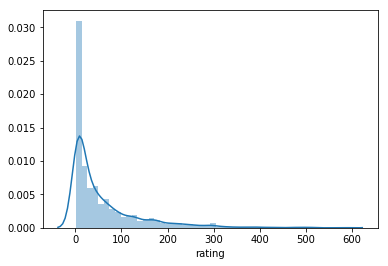

In [17]:
#To understand what to filter, let's see a distplot of the count of ratings
sns.distplot(df_dist_recensioni['rating'])

In [41]:
#Probably this correlation analysis is not so precise because cosinder all films also with one rating and 
#let's try to put a filter on the popular films with over 100 ratings
df2.head(2)

,movie_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)


In [44]:
df_dist_recensioni.reset_index(inplace=True)
df_dist_recensioni.head(2)

,index,title,rating
0,0,'Til There Was You (1997),9
1,1,1-900 (1994),5


In [55]:
df2_count = pd.merge(df2,df_dist_recensioni)
df2_count.drop('index',axis=1,inplace=True)
df2_count.head()

,movie_id,title,rating
0,1,Toy Story (1995),452
1,2,GoldenEye (1995),131
2,3,Four Rooms (1995),90
3,4,Get Shorty (1995),209
4,5,Copycat (1995),86


In [57]:
df1.shape

(100003, 3)

In [58]:
df2_count.shape

(1682, 3)

In [68]:
df_new = pd.merge(df1,df2_count,on='movie_id',how='left')
df_new_filtered = df_new[df_new['rating_y']>30]
df_new_filtered.head()

,user_id,movie_id,rating_x,title,rating_y
0,0,50,5,Star Wars (1977),584
1,0,172,5,"Empire Strikes Back, The (1980)",368
2,0,133,1,Gone with the Wind (1939),172
3,196,242,3,Kolya (1996),117
4,186,302,3,L.A. Confidential (1997),297


In [70]:
#Now we need to do again the pivot because we are unable to do the thing right but I woll do right and fuck the pivot
#So basically let's try to filter the corr table with the results of movie id>30
#So let's start from this point

In [71]:
print(df2_count.shape)
df2_count.head()

(1682, 3)


,movie_id,title,rating
0,1,Toy Story (1995),452
1,2,GoldenEye (1995),131
2,3,Four Rooms (1995),90
3,4,Get Shorty (1995),209
4,5,Copycat (1995),86


Let's add this column to the correlation series we get befor in order to filter the values with certain amount of feedback

In [74]:
type(corr)

pandas.core.series.Series

In [75]:
corr[:5]

title
'Til There Was You (1997)    1.000000
1-900 (1994)                -1.000000
101 Dalmatians (1996)        0.068118
12 Angry Men (1957)         -0.130298
187 (1997)                  -0.042281
dtype: float64

In [96]:
corr = pd.DataFrame(corr)

In [97]:
type(corr)

pandas.core.frame.DataFrame

In [98]:
corr.reset_index(inplace=True)

In [102]:
print(corr.shape)
corr.head(2)

(1664, 2)


,title,0
0,'Til There Was You (1997),1.0
1,1-900 (1994),-1.0


In [105]:
final = pd.merge(corr,df2_count,on='title')
final.shape

(1682, 4)

In [149]:
final.columns = ['title','corr','movie_id','rating_count']

In [151]:
final[final['rating_count']>100].sort_values(by='corr',ascending=False).head(10)

,title,corr,movie_id,rating_count
1409,Star Trek: First Contact (1996),1.000000,222,365
1410,Star Trek: Generations (1994),0.544052,380,116
1406,Star Trek IV: The Voyage Home (1986),0.519677,230,199
1412,Star Trek: The Wrath of Khan (1982),0.472177,228,244
578,"Fugitive, The (1993)",0.450320,79,336
1405,Star Trek III: The Search for Spock (1984),0.438677,229,171
1408,Star Trek VI: The Undiscovered Country (1991),0.433497,227,161
606,"Ghost and the Darkness, The (1996)",0.422097,148,128
336,Conspiracy Theory (1997),0.421552,328,295
1026,Mrs. Doubtfire (1993),0.411581,393,192


WHat we see is the if we increase the number of ratings for film, we will have more consistency in our data, even if the correlations of our best values is less that the correlation we had before

In [141]:
#So let's try to automate all the flow to not do all step by step
#But I will try another time to calculate the correlation by myself

f = df[['Star Trek: First Contact (1996)','Star Trek: Generations (1994)']]
df_calc = f[(f['Star Trek: First Contact (1996)']>0) & (f['Star Trek: Generations (1994)']>0)]
df_calc.columns=['x','y']
df_calc['xy']=df_calc['x']*df_calc['y']
df_calc['x2']=df_calc['x']**2
df_calc['y2']=df_calc['y']**2
df_calc.sum()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#index

x      406.0
y      363.0
xy    1417.0
x2    1620.0
y2    1319.0
dtype: float64

In [140]:
num = 108*1417 - 406*363
num

5658

In [143]:
den = ((108*1620-406**2)*(108*1319-363**2))**0.5
den

10399.744804561313

In [144]:
corr = num/den
corr

0.5440518114942984